In [1]:
import pandas as pd
import pmagpy.ipmag as ipmag
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'viridis'
%matplotlib inline

In [2]:
GPMDB = pd.read_excel('gpmdb_beta_20150811.xlsx')

In [3]:
GPMDB_Australia = GPMDB.loc[GPMDB['CONTINENT']=='Australia']
GPMDB_Australia_50Ma = GPMDB_Australia.ix[(GPMDB_Australia['HIGHAGE']<65) &#Only choose Cenozoic poles
                                           (GPMDB_Australia['LOWAGE']>1) & # Don't want archaeomagnetic stuff
                                           (GPMDB_Australia['YEAR']>1984) &# Choose more recent results (relatively)
                                           (GPMDB_Australia['N'] >= 20) & # Choose results with greater N
                                           (GPMDB_Australia['AUTHORS'] != 'Smith,M.L., Pillans,B.J., McQueen,K.G.') &#This has no age control
                                           (GPMDB_Australia['AUTHORS'] != 'Hill, M.J., Gratton, M.N., Shaw, J.')#Something is fishy about this study...
                                           ]
GPMDB_Australia_50Ma.to_csv('GPMDB_Australia_50Ma.csv')
GPMDB_Australia_50Ma[['AUTHORS', 'YEAR','PLAT','PLONG','HIGHAGE','LOWAGE', 'N']]


,AUTHORS,YEAR,PLAT,PLONG,HIGHAGE,LOWAGE,N
139,"Idnurm,M.",1985,68.4,298.7,28,23,34.0
140,"Idnurm,M.",1985,77.2,303.5,14,10,48.0
141,"Idnurm,M.",1985,83.2,283.6,4,2,58.0
142,"Idnurm,M.",1985,61.7,298.4,62,58,20.0
7103,"Idnurm,M.",1994,65.5,292.5,39,34,66.0


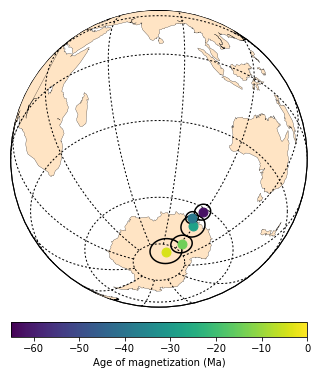

In [12]:
m = Basemap(projection='ortho',lat_0=-45,lon_0=260-180.,resolution='c',area_thresh=50000)
plt.figure(figsize=(6, 6))
m.drawcoastlines(linewidth=0.25)
m.fillcontinents(color='bisque',lake_color='white',zorder=1)
m.drawmapboundary(fill_color='white')
m.drawmeridians(np.arange(0,360,30))
m.drawparallels(np.arange(-90,90,30))

for n in GPMDB_Australia_50Ma.index:
    pole = ipmag.plot_pole_colorbar(m,GPMDB_Australia_50Ma['PLONG'][n]-180.,
                             -GPMDB_Australia_50Ma['PLAT'][n],
                             GPMDB_Australia_50Ma['DP'][n],
                             -GPMDB_Australia_50Ma['HIGHAGE'][n],
                             -65,0,markersize=80, color="k", alpha=1)
m.colorbar(pole,location='bottom',pad="5%",label='Age of magnetization (Ma)')
plt.show()

Generate Torsvik_Aus_S.csv using Kinematics tool in GPlates to reconstruc lat=-90 lon=0 for plate ID 1 (spin axis) relative to Anchor Plate ID 801 (Australia) in 1 Myr steps.

In [23]:
Torsvik2017_pole = pd.read_csv('../../gplates/Torsvik2017/Torsvik_Aus_S.csv')
Torsvik2017_pole_Cenozoic = Torsvik2017_pole.ix[Torsvik2017_pole['Time (Ma)']<65]
Torsvik2017_pole_Cenozoic = Torsvik2017_pole_Cenozoic.ix[Torsvik2017_pole_Cenozoic['Time (Ma)']>0]
Torsvik2017_pole_Cenozoic.head()

Seton2012_pole = pd.read_csv('../../gplates/Seton2012/Seton_Aus_S.csv')
Seton2012_pole_Cenozoic = Seton2012_pole.ix[Seton2012_pole['Time (Ma)']<65]
Seton2012_pole_Cenozoic = Seton2012_pole_Cenozoic.ix[Seton2012_pole_Cenozoic['Time (Ma)']>0]
Seton2012_pole_Cenozoic.head()

,Time (Ma),Lat,Lon,V mag (cm/yr),V azimuth (�),V colat (cm/yr),V lon (cm/yr),Ang V (�/Ma)
136,64,-62.6628,125.0263,4.1962,170.4301,4.1378,0.6976,-0.5274
137,63,-62.6701,124.7513,4.7913,168.5746,4.6963,0.9491,-0.5914
138,62,-62.9343,124.6969,5.1316,168.2589,5.0242,1.0442,-0.6113
139,61,-63.1987,124.6361,5.3160,168.5095,5.2094,1.0590,-0.6169
140,60,-63.4631,124.5686,5.4338,168.9670,5.3334,1.0399,-0.6165


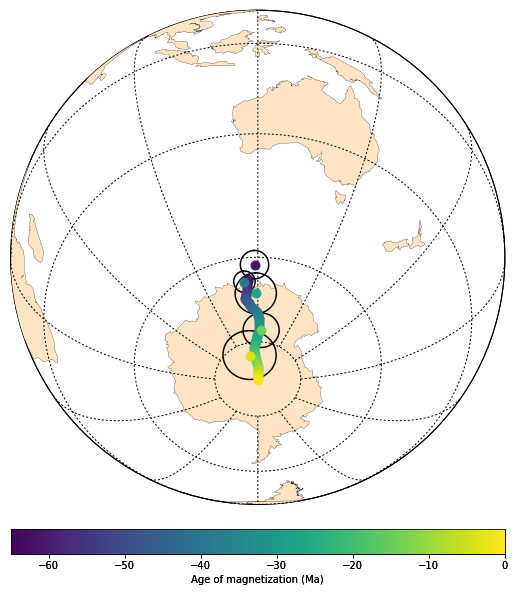

In [29]:
m = Basemap(projection='ortho',lat_0=-60,lon_0=120,resolution='c',area_thresh=50000)
plt.figure(figsize=(10, 10))
m.drawcoastlines(linewidth=0.25)
m.fillcontinents(color='bisque',lake_color='white',zorder=1)
m.drawmapboundary(fill_color='white')
m.drawmeridians(np.arange(0,360,30))
m.drawparallels(np.arange(-90,90,30))

for n in Torsvik2017_pole_Cenozoic.index:
    pole = ipmag.plot_pole_colorbar(m,Torsvik2017_pole_Cenozoic['Lon'][n],
                             Torsvik2017_pole_Cenozoic['Lat'][n],
                             0,
                             -Torsvik2017_pole_Cenozoic['Time (Ma)'][n],
                             -65,0,markersize=80, color="k", alpha=1)
    
m.colorbar(pole,location='bottom',pad="5%",label='Age of magnetization (Ma)')

for n in GPMDB_Australia_50Ma.index:
    pole = ipmag.plot_pole_colorbar(m,GPMDB_Australia_50Ma['PLONG'][n]-180.,
                             -GPMDB_Australia_50Ma['PLAT'][n],
                             GPMDB_Australia_50Ma['DP'][n],
                             -GPMDB_Australia_50Ma['HIGHAGE'][n],
                             -65,0,markersize=80, color="k", alpha=1)
    
m.colorbar(pole,location='bottom',pad="5%",label='Age of magnetization (Ma)')

plt.show()

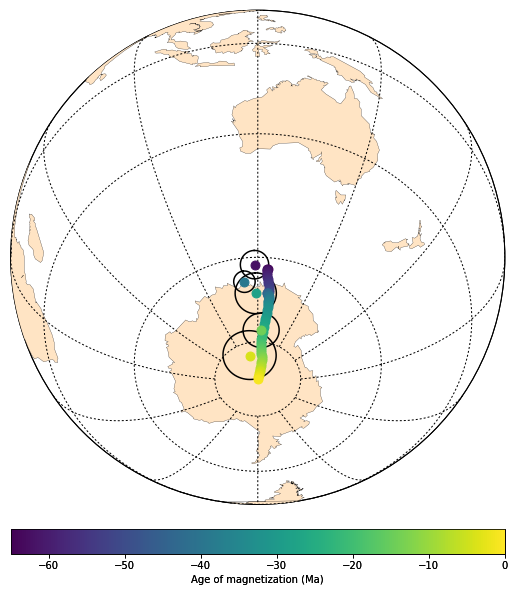

In [28]:
m = Basemap(projection='ortho',lat_0=-60,lon_0=120.,resolution='c',area_thresh=50000)
plt.figure(figsize=(10, 10))
m.drawcoastlines(linewidth=0.25)
m.fillcontinents(color='bisque',lake_color='white',zorder=1)
m.drawmapboundary(fill_color='white')
m.drawmeridians(np.arange(0,360,30))
m.drawparallels(np.arange(-90,90,30))

for n in Seton2012_pole_Cenozoic.index:
    pole = ipmag.plot_pole_colorbar(m,Seton2012_pole_Cenozoic['Lon'][n],
                             Seton2012_pole_Cenozoic['Lat'][n],
                             0,
                             -Seton2012_pole_Cenozoic['Time (Ma)'][n],
                             -65,0,markersize=80, color="k", alpha=1)
    
m.colorbar(pole,location='bottom',pad="5%",label='Age of magnetization (Ma)')

for n in GPMDB_Australia_50Ma.index:
    pole = ipmag.plot_pole_colorbar(m,GPMDB_Australia_50Ma['PLONG'][n]-180.,
                             -GPMDB_Australia_50Ma['PLAT'][n],
                             GPMDB_Australia_50Ma['DP'][n],
                             -GPMDB_Australia_50Ma['HIGHAGE'][n],
                             -65,0,markersize=80, color="k", alpha=1)
    
m.colorbar(pole,location='bottom',pad="5%",label='Age of magnetization (Ma)')

plt.show()